In [267]:
import pandas as pd
import numpy as np


#### El primer paso es importar el csv para poder empezar a trabajar con el y ver el encabezado de la tabla
#### para averiguar las columnas que tiene.

In [268]:

dsharks = pd.read_csv("./s_attacks.csv", encoding="latin-1")
dsharks.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN


#### Como hemos visto que las 2 ultimas columnas no tienen nombre, vamos a "imprimir" el nombre que les ha asignado
#### el sistema para poder trabajar con ellas y analizar si estas columnas tienen alguna relevancia.


In [272]:
print(list(dsharks.columns))

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


#### Aqui podemos ver que en toda esta columna sólo hay un valor válido, por lo que deducimos que esta columna carece de interés.


In [273]:
dsharks['Unnamed: 22'].isna().value_counts()

True     5991
False       1
Name: Unnamed: 22, dtype: int64

#### Aqui podemos ver que en toda esta columna sólo hay dos valores válidos, por lo que deducimos que esta columna carece de interés.

In [274]:
dsharks['Unnamed: 23'].isna().value_counts()

True     5990
False       2
Name: Unnamed: 23, dtype: int64

#### Eliminamos ambas columnas

In [275]:
to_delete = ['Unnamed: 22','Unnamed: 23']
dsharks.drop(to_delete, axis=1, inplace=True)
dsharks.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992


#### En el encabezado, tambien he visto que hay tres columnas que se llaman prácticamente igual, por lo que el siguiente paso que voy a realizar es verificar si los datos contenidos en dichas columnas son similares

In [276]:
import difflib

c = difflib.SequenceMatcher(None, dsharks['Case Number'], dsharks['Case Number.1']).ratio()

c

0.99783044058745

Esta función devuelve el ratio de coincidencias entre ambas columnas.
Vemos que el ratio de coincidencias es un 99,78%, por lo que vamos a proceder a eliminar esta columna

In [277]:
d = difflib.SequenceMatcher(None, dsharks['Case Number'], dsharks['Case Number.2']).ratio()

d

0.9996662216288384

Vemos  que el ratio de coincidencias es un 99,96%, por lo que vamos a proceder a eliminar esta columna también

#### Eliminamos ambas columnas 

In [278]:
to_del = ['Case Number.1','Case Number.2']
dsharks.drop(to_del, axis=1, inplace=True)
dsharks.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5992


#### Vemos que tambien disponemos de las columnas "pdf", "href formula", "href", "Investigator of source" y "original order" 
#### Estas columnas no aportan información relevante más alla de la fuente de información por lo que también vamos a eliminarlas para así disponer de un dataframe más manejable

In [279]:
to_del1 = ['pdf','href formula', 'href', 'Investigator or Source', 'original order']
dsharks.drop(to_del1, axis=1, inplace=True)
dsharks.head(2)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN


#### Vamos a revisar la columna de Date, para mi análisis no he usado el .head() ya que necesitaba ver las distintas discrepancias.

In [280]:
list(dsharks['Date'].head())

['18-Sep-16', '18-Sep-16', '18-Sep-16', '17-Sep-16', '16-Sep-16']

Vemos que las fechas están en varios formatos y que hay bastante inconsistencia en los datos, por lo que poco a poco vamos a ir limpiando esta columna, ya que las fechas son relevantes para nuestro análisis.

#### En el proceso de limpieza de datos, vamos a empezar por quitar las fechas anteriores a 1950, ya que no son relevantes para el análisis que se pretende llevar a cabo

In [281]:
dsharks.drop(dsharks.loc[dsharks['Year']<1950].index, inplace=True)

dsharks.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN


#### El siguiente paso consistirá extraer el mes que figura en el campo "Date", implantando este dato en un nuevo campo llamado "Month" y despreciar aquellos datos de los que no se pueda extraer el mes


In [282]:
def meses(m):
    nmonth = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,
              'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
    for mmh, mdy in nmonth.items():
        if mmh in m:
            return str(mdy)
    return None

dsharks['Month'] = dsharks['Date'].apply(meses)


dsharks.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Month
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,9
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,9


#### Como podemos ver, la columna "Month" se ha agregado al final, por lo que nuestro siguiente paso será situarla junto al campo "Year".

In [284]:
print(list(dsharks.columns))

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Month']


In [285]:
dsharks = dsharks[['Case Number', 'Date', 'Month', 'Year', 'Type', 'Country', 'Area', 'Location',
 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ']]
print(list(dsharks.columns))

['Case Number', 'Date', 'Month', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ']


#### Aqui podemos ver que los datos de la columna "Fatal" son bastante coherentes.

In [286]:
print(dsharks['Fatal (Y/N)'].value_counts())
print('Tamaño: ',dsharks.shape)

N          3441
Y           764
UNKNOWN      50
 N            8
Name: Fatal (Y/N), dtype: int64
Tamaño:  (4271, 16)


#### Aqui vemos que la columna de "Activity" contiene muchos datos desagregados, por lo que vamos a proceder a limpiarla.

El primer paso es cambiar el nombre de la columna, para establecer una nueva columna con el mismo nombre, pero más estandarizada.

In [287]:
dsharks.rename(columns={'Activity':'dactivity'}, inplace=True)

#print(dsharks['dactivity'].to_string())

In [288]:
dsharks['dactivity'].value_counts().head()

Surfing         894
Swimming        518
Spearfishing    316
Fishing         256
Wading          128
Name: dactivity, dtype: int64

El segundo paso, para evitar incidencias en el siguiente paso, es rellenar los valores nulos con un valor aleatorio.

In [289]:
dsharks['dactivity'].fillna('Other')
dsharks['dactivity'] = dsharks['dactivity'].astype(str)

##### En este paso, vamos a crear un diccionario con las actividades más relevantes para así estandarizar la actividad, ya que será un campo relevante para nuestro análisis

In [290]:
def findact(cvb):
    cactv = {'Surfing':'Surfing',
              'Surf':'Surfing',
              'Kite surfing':'Surfing',
              'Kitesurfing':'Surfing',
              'Wind surfing':'Surfing',
              'Windsurfing':'Surfing',
              'Body surfing':'Surfing',
              'Swimming':'Swimming',
              'swimming':'Swimming',
              'Swim':'Swimming',
              'swim':'Swimming',
              'bath':'Swimming',
              'Bath':'Swimming',
              'bathing':'Swimming',
              'Bathing':'Swimming',
              'float':'Swimming',
              'Float':'Swimming',
              'floating':'Swimming',
              'Floating':'Swimming',
              'Fishing':'Fishing',
              'fish':'Fishing',
              'Diving':'Diving',
              'diving':'Diving',
              'Wading':'Wading',
              'wading':'Wading',
              'Walking':'Wading',
              'walking':'Wading',
              'Standing':'Wading',
              'standing':'Wading',
              'Body boarding':'Body boarding',
              'Body-boarding':'Body boarding',
              'boarding':'Body boarding',
              'Spearfishing':'Diving',
              'Snorkeling':'Diving',
              'Scuba':'Diving',
              'Boogie boarding':'Body boarding',
              'Boogie Boarding':'Body boarding',
              'Boat':'Boat',
              'Canoe':'Boat',
              'kayak':'Boat',
              'Kayaking':'Boat',
              'sail':'Boat',
              'row':'Boat',
              'Row':'Boat',
              'rowing':'Boat',
              'Rowing':'Boat',
              'yatch':'Boat',
              'shark':'Provoke',
              'Sailing':'Boat',
              'sailing':'Boat',
              'Sail':'Boat',
              'sail':'Boat',
             }
    for cvar, sact in cactv.items():
        if cvar in cvb:
            return str(sact)
    return 'Other'

dsharks['Activity'] = dsharks['dactivity'].apply(findact)


dsharks.head(2)


,Case Number,Date,Month,Year,Type,Country,Area,Location,dactivity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Activity
0,2016.09.18.c,18-Sep-16,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,Surfing
1,2016.09.18.b,18-Sep-16,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,Surfing


Ahora podemos ver que la columna "Activity" ya está categorizada de una forma apropiada.

In [291]:
dsharks['Activity'].value_counts()

Surfing          1037
Fishing           814
Swimming          693
Other             673
Diving            461
Wading            259
Body boarding     132
Provoke           115
Boat               87
Name: Activity, dtype: int64

##### Una vez limpiada la columna "Activity", vamos a reubicarla y a eliminar la columna de "dactivity"

In [292]:
del dsharks['dactivity']
dsharks = dsharks[['Case Number', 'Date', 'Month', 'Year', 'Type', 'Country', 'Area', 'Location',
 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ']]
list(dsharks.columns)

['Case Number',
 'Date',
 'Month',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex ',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species ']

A lo largo del ejercicio; para poder visualizar el resultado completo de la labor de limpieza y estandarización he utilizado la función --> pd.set_option("display.max_rows",10000)
Esta función me ha permitido visualizar la tabla al completo, por lo que he podido subsanar los errores que han ido aconteciendo en el desarrollo de las funciones.

In [293]:
sharks = dsharks
sharks.to_csv('./sharks.csv')
sharks.head(2)

,Case Number,Date,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2016.09.18.c,18-Sep-16,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN
1,2016.09.18.b,18-Sep-16,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN


# Análisis

Antes de comenzar, vamos a importar las librerías que vamos a necesitar:

In [294]:
import matplotlib.pyplot as plt
from pylab import *

#### En nuestro primer análisis, vamos a comparar los ataques de tiburones segun la población estimada por año para ello, he encontrado una estimación de la población anual en la web https://ourworldindata.org/world-population-growth

In [295]:
population = pd.read_csv('./population_total.csv')
population.head(3)

,Year,Total world population
0,1950,2532392455
1,1951,2579907584
2,1952,2626640793


Ahora vamos a crear una lista de ataques de tiburones por año

In [296]:
sharks_attack = sharks.groupby(['Year']).size().reset_index(name='Sharks_attacks')
sharks_attack.head(2)

,Year,Sharks_attacks
0,1950,43
1,1951,31


In [301]:
shark_ap = pd.merge(sharks_attack, population, on='Year')
shark_ap.head()

,Year,Sharks_attacks,Total world population
0,1950,43,2532392455
1,1951,31,2579907584
2,1952,29,2626640793
3,1953,36,2673247873
4,1954,42,2720278371


##### Aqui mostramos la evolución de los ataques de tiburones desde 1950 hasta el día de hoy

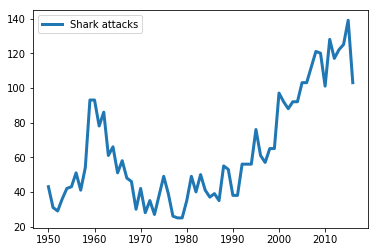

In [302]:
%matplotlib inline

plt.plot(shark_ap['Year'],shark_ap['Sharks_attacks'], linewidth=3.0, label="Shark attacks")

plt.legend(loc="upper left")

#### Esta es la evolución del crecimiento de la población mundial entre 1950 hasta 2016

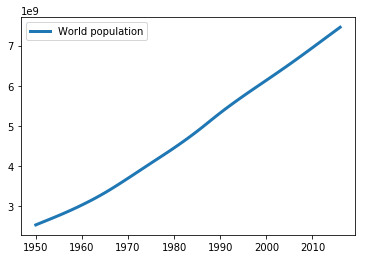

In [303]:
plt.plot(shark_ap['Year'],shark_ap['Total world population'], linewidth=3.0, label="World population")
plt.legend(loc="upper left")

##### Para poder establecer un parámetro de comparación, vamos a calcular la probabilidad de ataque de tiburón que puede tener una persona en cada año


In [305]:
shark_ap['probability'] = shark_ap['Sharks_attacks'] / shark_ap['Total world population']

pd.set_option("display.max_rows",30)

shark_ap.to_csv('./sharks_attacks_population.csv')
shark_ap.head(3)

,Year,Sharks_attacks,Total world population,probability
0,1950,43,2532392455,1.697999e-08
1,1951,31,2579907584,1.201593e-08
2,1952,29,2626640793,1.104072e-08


###### Una vez hecho esto, ya podemos establecer una relación entre ambos

### Representación gráfica lineal

Current size: [11.0, 4.7]


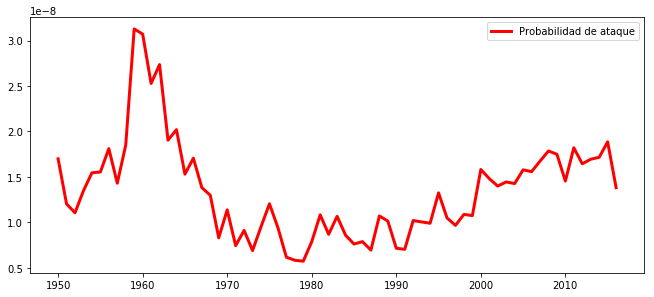

In [309]:
plt.plot(shark_ap['Year'],shark_ap['probability'], linewidth=3.0, color='r', label="Probabilidad de ataque")
plt.legend(loc="upper right")

fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 11.0
fig_size[1] = 4.7
plt.rcParams["figure.figsize"] = fig_size


### Representación gráfica Stack Plot

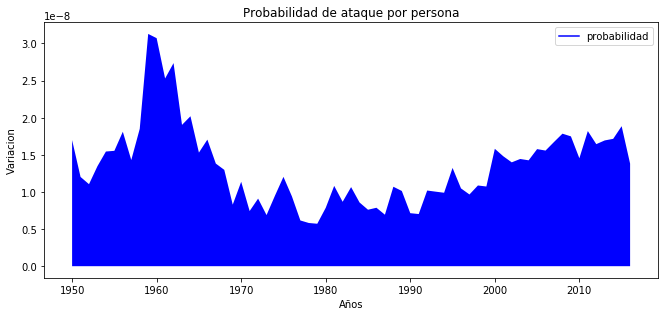

In [310]:
year = shark_ap['Year']
sk = shark_ap['probability']


plt.plot([],[],color='b', label='probabilidad')

plt.stackplot(year,sk,colors = ['b'])
plt.legend()
plt.title('Probabilidad de ataque por persona')
plt.xlabel('Años')
plt.ylabel('Variacion')


plt.show()

### Nuestro siguiente análisis consistirá en mostrar un histórico del riesgo de ataque según la actividad que se estaba realizando

In [313]:
act_risk = sharks.groupby(['Activity']).size().reset_index(name='Sharks_attacks')
act_risk['Danger ratio'] = act_risk['Sharks_attacks']/act_risk['Sharks_attacks'].sum()
act_risk = act_risk.sort_values(by=['Sharks_attacks'], ascending=False)
act_risk.to_csv('./sharks_attack_ratio.csv')
act_risk.head(10)

,Activity,Sharks_attacks,Danger ratio
6,Surfing,1037,0.242800
3,Fishing,814,0.190588
7,Swimming,693,0.162257
4,Other,673,0.157574
2,Diving,461,0.107937
8,Wading,259,0.060642
1,Body boarding,132,0.030906
5,Provoke,115,0.026926
0,Boat,87,0.020370


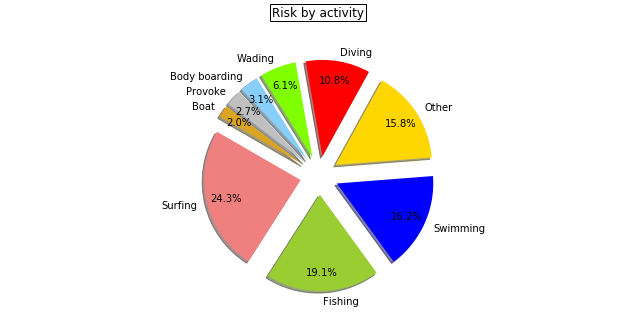

In [314]:
labels = act_risk['Activity']
sizes = act_risk['Danger ratio']
colors = ['lightcoral', 'yellowgreen', 'blue', 'gold', 'red', 'chartreuse', 'lightskyblue', 'silver', 'goldenrod']
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=150, pctdistance=0.8)
plt.title("Risk by activity", y=1.1, bbox={"facecolor":"1", "pad":2})


plt.axis('equal')
plt.show()